# Pat Martino's Chromatic Pattern(s) #   
In this YouTube video, Pat starts his demonstration of an ascending pattern on C.   
https://youtu.be/h9Nny4db27c  

The same pattern, starting from B, is used in a portion of HOTLINE #6 from this book.    
https://www.halleonard.com/product/70031/jazz-pat-martino

According to Chuck Jones, Pat has various other patterns both ascending and descending.  He demonstrates a descending pattern from Pat in this video.  
https://youtu.be/itROVJ0G4rA

## Ascending Patterns ## 
Python is useful for finding all the permutations or patterns constrained to an 'area of activity' on the fretboard.  The start and stop frets of the 'area of activity' are defined in the tuple **fretRange**.  

In [1]:
fretRange = (2,5)

Arbitrary assignment of notes to integers as such:  
0:'C', 1:'C#', 2:'D', 3:'D#', 4:'E', 5:'F',
6:'F#', 7:'G', 8:'G#', 9:'A', 10:'A#', 11:'B'  

Define your instrument's set of open strings.  For example, the strings of a regular 6 string guitar from the highest pitched string to the lowest are E, B, G, D, A, and E.  Then the string set of a regular guitar is the following: 

In [2]:
stringSet = {1:[4, 'E', 329.63],
             2:[11, 'B', 246.94],
             3:[7, 'G', 196.00],
             4:[2, 'D', 146.83],
             5:[9, 'A', 110.00],
             6:[4, 'E', 82.41]}

The keys of the dict are the string numbers.  Within the list are the integer representation of the open string note, the note itself, and the frequency.

The notes of each string in the fret range are found with **fretboardAreaNotesGen**.

In [3]:
import numpy as np

def fretboardAreaNotesGen(stringSet, fretRange):
    '''
    Parameters
    ----------
    stringSet : List
        The list of open strings of the instrument.
    fretRange : tuple
        The two integers in the tuple defines the 
        start and stop frets in the 'area of activity'

    Returns
    -------
    fretboardArea : list of lists
        Each list within the list represents a string. 
        Withing each list, are the notes defined within 
        fretRange
    '''
    fretboardAreaNotes = {}
    fretSpan = fretRange[1] - fretRange[0] + 1
    fretStart = fretRange[0]
    for string in stringSet.keys():
        openStringNote = stringSet[string][0]
        fretboardAreaNotes[string]=list((np.arange(fretSpan)+fretStart+openStringNote)%12)
    return fretboardAreaNotes    
        
fretboardAreaNotes = fretboardAreaNotesGen(stringSet, fretRange)

In [4]:
fretboardAreaNotes

{1: [6, 7, 8, 9],
 2: [1, 2, 3, 4],
 3: [9, 10, 11, 0],
 4: [4, 5, 6, 7],
 5: [11, 0, 1, 2],
 6: [6, 7, 8, 9]}

With a given starting note, the possible string fret combinations for each chromatic note is found using **stringFretComboGen**.  

In [5]:
direction = 'ascend'
start = 11

In [6]:
def stringFretComboGen(startNote, fretRange, fretboardAreaNotes, direction='ascend'):
    '''
    Parameters
    ----------
    startNote : int
        The integer representation of the starting note.
    fretboardAreaNotes : list of list of integers
        The lists represent the strings of the defined fretboard.
        The integers within each list are the integer
        representation of the notes on that string for each
        fret in the defined range of frets
    direction: 'ascend' or whatever

    Returns
    -------
    stringFretCombo : list of lists of tuples
        The lists represent the starting note and subsequent 
        chromatic notes. There are 13 lists since the ocatave is 
        included.  Within each list, are tuples of possible 
        (string, fret) combination in their integer representation.

    '''
    if direction == 'ascend':
        patDir = 1
    else:
        patDir = -1
        
    stringFretCombo=[]
    currentNote = startNote
    for _ in range(13) :
        noteLst = []
        for string in fretboardAreaNotes.keys():
            notes = fretboardAreaNotes[string]
            if currentNote in notes:
                fret = notes.index(currentNote) + fretRange[0]
                noteLst.append((string, fret))
        stringFretCombo.append(noteLst)        
        currentNote = (currentNote + patDir) % 12
    return stringFretCombo

startNote = start
stringFretCombo = stringFretComboGen(startNote, fretRange, fretboardAreaNotes, direction) 

In [7]:
stringFretCombo

[[(3, 4), (5, 2)],
 [(3, 5), (5, 3)],
 [(2, 2), (5, 4)],
 [(2, 3), (5, 5)],
 [(2, 4)],
 [(2, 5), (4, 2)],
 [(4, 3)],
 [(1, 2), (4, 4), (6, 2)],
 [(1, 3), (4, 5), (6, 3)],
 [(1, 4), (6, 4)],
 [(1, 5), (3, 2), (6, 5)],
 [(3, 3)],
 [(3, 4), (5, 2)]]

Using the results of **stringFretComboGen**, the number of different permutations or patterns can be computed with **perCalc**.

In [8]:
def permCalc(stringFretCombo):
    combo=1
    for notes in stringFretCombo:
        combo = combo * len(notes)
    print('There are',combo, 'different patterns')
    
permCalc(stringFretCombo)

There are 3456 different patterns


Function **patternsGen** is used to explicitly list out all 3456 patterns 

In [12]:
def patternsGen(stringFretCombo):
    '''
    All possible patterns of the chromatic scale from the
    defined starting note, starting fret, and fret span are
    collected into lists of tuples

    Parameters
    ----------
    stringFretCombo : list of lists of tuples
        The lists represent the starting note and subsequent 
        chromatic notes. There are 13 lists since the ocatave is 
        included.  Within each list, are tuples of possible 
        (string, fret) combination in their integer representation.

    Returns
    -------
    patterns : list of lists of tuples
        Each list represents a pattern of the chromatic scale
        in the previously defined fretboard area.
        The tuples in each list are the (string, fret) of 
        the chromatic scale.

    '''
    patterns=[]
    chromaLst = []
     
    def recur(noteIndex):
        '''
        Parameters
        ----------
        noteIndex : int
            The integer representing the starting note.
        
        Returns
        -------
        None.
    
        '''
        if noteIndex == 13:
            # Once thenoteIndex is 13, the octave cycle
            # is complete with the octave note included  
            patterns.append(chromaLst.copy())
            return
        else:
            for note in stringFretCombo[noteIndex]:
                chromaLst.append(note)
                recur(noteIndex + 1)
                chromaLst.pop()                
    recur(0)
    return patterns

patterns = patternsGen(stringFretCombo)

Just to verify the math, the length of patterns is checked.

In [13]:
len(patterns)

3456

The pattern as demonstrated by Pat, but starting on B, is defined in the cell below. 

In [21]:
martino = [(5, 2), (3, 5), (5, 4), (2, 3), (2, 4), (4, 2), (4, 3), (1, 2), (1, 3), (6, 4), (6, 5), (3, 3), (3, 4)] 

**findPatMartinoPattern** will return the index pointing to Pat's pattern within **patterns**.   

In [22]:
def findPatMartinoPattern(patterns):
    '''
    Find the Pat Martino pattern (PMP) in all possible 
    patterns generated based on the starting note, 
    starting fret, and fret span

    Parameters
    ----------
    patterns : patterns
        All possible patterns found by 'patternsGen'

    Returns
    -------
    The index pointing to PMP in patterns

    '''
   
    PMPI = 0
    for patI, testPat in enumerate(patterns):
        test = 1
        for I, stringFretI in enumerate(testPat):
            if martino[I] != stringFretI:
                test = 0
                break
        if test == 1:
            print("Pat Martino's pattern is at index",patI)
            PMPI = patI
            break
    return PMPI    

pat_index = findPatMartinoPattern(patterns)

Pat Martino's pattern is at index 2278


To make a fretboard plot of a specific pattern, the **fretboardPlot** function is used.

In [23]:
pattern = patterns[pat_index]
#pattern = patterns[2000]
pattern

[(5, 2),
 (3, 5),
 (5, 4),
 (2, 3),
 (2, 4),
 (4, 2),
 (4, 3),
 (1, 2),
 (1, 3),
 (6, 4),
 (6, 5),
 (3, 3),
 (3, 4)]

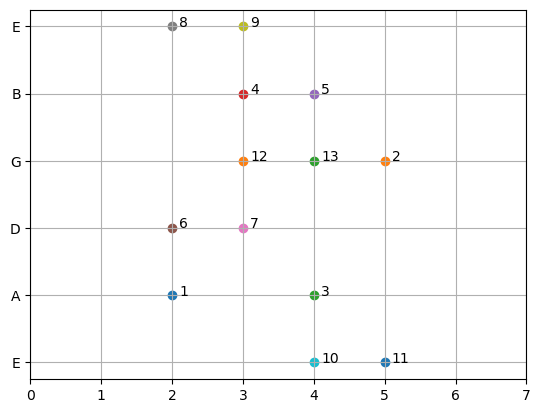

In [24]:
import matplotlib.pyplot as plt

def fretboardPlot(pattern, stringSet, fretRange):
    plt.clf()
  
    # Y-Axis Info
    numStrings = len(stringSet)
    yAxNum = np.arange(-1*numStrings, 0, 1)
    yAxNote = []
    for string in stringSet.keys():
        yAxNote.append(stringSet[string][1])
    yAxNote.reverse() 
    
    # X-Axis Info
    if fretRange[0] - 3 < 0:
        xAxStart = 0
    else:
        xAxStart = fretRange[0] - 2
    xAxStop = fretRange[1] + 3
    xAx = np.arange(xAxStart, xAxStop)
    
    for i, stringFret in enumerate(pattern):
        # string
        y = stringFret[0]
        # fret
        x = stringFret[1]
        # consider the case that start and end are the same note
        if i == len(pattern)-1 and stringFret == pattern[0]:
            plt.text(x + 0.1, -1*y, '1, '+str(i+1))           
        else:
            plt.text(x + 0.1, -1*y, i+1)
        plt.scatter(x, -1*y)
    
    plt.xticks(xAx)    
    plt.yticks(yAxNum, yAxNote)
    plt.grid()
    plt.show()

fretboardPlot(pattern, stringSet, fretRange)

To hear what the pattern sounds like, function **playChromaticPattern** is used.  
After all 13 notes are played, the pattern is repeated but shifted up or down one fret.  The number of times that the pattern is shifted up or down is defined by **cycles**.

In [25]:
fs = 44100
noteDuration = .2
cycles = 7

In [26]:
import sounddevice as sd

def playChromaticPattern(pattern, stringSet, fs, noteDuration, cycles, direction='ascend'):
    timeArray = np.arange(0, noteDuration, 1/fs)
    noteLength = len(timeArray)
    cycleLength = noteLength*len(pattern)
    buffer = np.zeros(cycleLength*cycles)
    windowArray = np.hanning(len(timeArray))   
    for cycle in range(cycles):
        for I, stringFret in enumerate(pattern): 
            string = stringFret[0]
            if direction == 'ascend':
                fret = stringFret[1] + cycle
            else:
                fret = stringFret[1] - cycle
            
            freq = stringSet[string][2]*((2**(1/12))**fret) 
            note = (2**15-1)*np.sin(2*np.pi*freq*timeArray)
            noteWindowed = note*windowArray
            buffer[I*noteLength + cycleLength*cycle : 
                    (I+1)*noteLength + cycleLength*cycle] = noteWindowed      
    buffer = buffer.astype(np.int16)
    sd.play(buffer, fs)
    #sd.stop()
    
playChromaticPattern(pattern, stringSet, fs, noteDuration, cycles, direction)    

## Descending Patterns

According to Chuck, the descending pattern he learned from Pat is in the fret range of 9 to 14.  

In [27]:
fretRange = (9,14)
fretboardAreaNotes = fretboardAreaNotesGen(stringSet, fretRange)
fretboardAreaNotes

{1: [1, 2, 3, 4, 5, 6],
 2: [8, 9, 10, 11, 0, 1],
 3: [4, 5, 6, 7, 8, 9],
 4: [11, 0, 1, 2, 3, 4],
 5: [6, 7, 8, 9, 10, 11],
 6: [1, 2, 3, 4, 5, 6]}

The starting note is E, or 4 in terms of **noteKey**.

In [28]:
startNote = 4
stringFretCombo = stringFretComboGen(startNote, fretRange, fretboardAreaNotes, 'descend') 
stringFretCombo

[[(1, 12), (3, 9), (4, 14), (6, 12)],
 [(1, 11), (4, 13), (6, 11)],
 [(1, 10), (4, 12), (6, 10)],
 [(1, 9), (2, 14), (4, 11), (6, 9)],
 [(2, 13), (4, 10)],
 [(2, 12), (4, 9), (5, 14)],
 [(2, 11), (5, 13)],
 [(2, 10), (3, 14), (5, 12)],
 [(2, 9), (3, 13), (5, 11)],
 [(3, 12), (5, 10)],
 [(1, 14), (3, 11), (5, 9), (6, 14)],
 [(1, 13), (3, 10), (6, 13)],
 [(1, 12), (3, 9), (4, 14), (6, 12)]]

In [32]:
descendingPatterns = patternsGen(stringFretCombo)

As demonstrated by Chuck, the pattern is the following:

In [33]:
martino = [(1,12), (6,11), (4,12), (1,9), (2,13), (4,9), (2,11), (5,12), (5,11), (3,12), (1,14), (3,10), (3,9)]

In [34]:
pat_index = findPatMartinoPattern(descendingPatterns)
pat_index

Pat Martino's pattern is at index 292805


292805

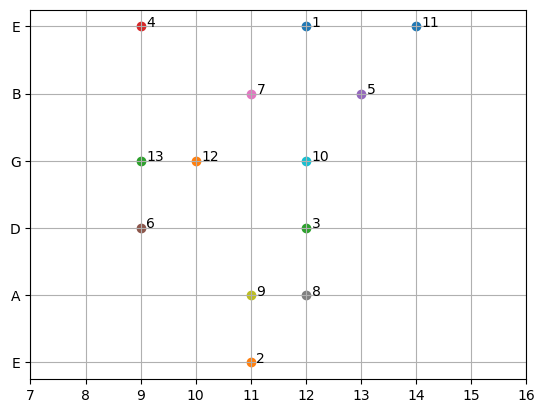

In [35]:
pattern = descendingPatterns[pat_index]
fretboardPlot(pattern, stringSet, fretRange)

In [36]:
playChromaticPattern(pattern, stringSet, fs, noteDuration, cycles, 'descending')  